<h2>ML ASSIGNMENT 01</h2>
<h4 style="font-weight: normal">1. K - Nearest Neighbour Algorithm from scratch</h4>
<h4 style="font-weight: normal">2. Training error & Testing error</h4>
<h4 style="font-weight: normal">3. Classification Report</h4>
<h4 style="font-weight: normal">4. K - Fold Cross Validation</h4>
<h4 style="font-weight: normal">5. Confusion Matrix</h4>
<h4 style="font-weight: normal">6. Precision v/s Recall</h4>

<h3>Importing all necessary libraries</h3>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

<h3>Loading Dataset (CIFAR10) and taking a small part of it</h3>

In [2]:
(Train_A, Train_B), (Test_A, Test_B) = cifar10.load_data()

Train_X = Train_A[0:1000]
Test_X = Test_A[0:200]

Train_Y = Train_B[0:1000]
Test_Y = Test_B[0:200]

print('Total training samples available in the dataset: ', Train_A.shape[0])
print('Total testing samples available in the dataset: ', Test_A.shape[0])
print('\nTotal training samples taken: ', Train_X.shape[0])
print('Total testing samples taken: ', Test_Y.shape[0])

Total training samples available in the dataset:  50000
Total testing samples available in the dataset:  10000

Total training samples taken:  1000
Total testing samples taken:  200


<h3>Displaying Some Sample Data Items</h3>


Training Data Samples: 


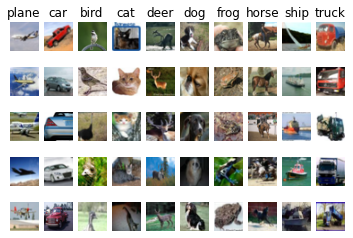


Testing Data Samples: 


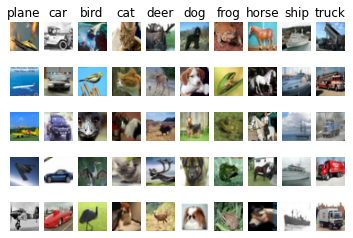

In [3]:
Class_List = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_Classes = len(Class_List)
Random_count = 5

print("\nTraining Data Samples: ")

for y, T in enumerate(Class_List):
    data = np.flatnonzero(Train_Y == y)
    data = np.random.choice(data, Random_count, replace=False)
    for i, T_s in enumerate(data):
        Score = i * n_Classes + y + 1
        plt.subplot(Random_count, n_Classes, Score)
        plt.imshow(Train_X[T_s].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(T)
plt.show()

print("\nTesting Data Samples: ")


for y, T in enumerate(Class_List):
    data = np.flatnonzero(Test_Y == y)
    data = np.random.choice(data, Random_count, replace=False)
    for i, T_s in enumerate(data):
        Score = i * n_Classes + y + 1
        plt.subplot(Random_count, n_Classes, Score)
        plt.imshow(Test_X[T_s].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(T)
plt.show()

<h3>Reshaping The Images In my Dataset into Vector Type</h3>

In [4]:
Train_X = np.reshape(Train_X, (Train_X.shape[0], -1))
Test_X = np.reshape(Test_X, (Test_X.shape[0], -1))
Train_X=Train_X/255.0
Test_X=Test_X/255.0

print(Train_X.shape, Test_X.shape)
print(Train_X)
print(Test_X)

(1000, 3072) (200, 3072)
[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.56862745 0.58039216 0.61568627 ... 0.49411765 0.62745098 0.35686275]
 [0.57254902 0.57254902 0.57254902 ... 0.93333333 0.93333333 0.93333333]
 [0.79607843 0.80784314 0.81568627 ... 0.51764706 0.51372549 0.49411765]]
[[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.92941176 0.89803922 0.82352941 ... 0.74117647 0.69411765 0.63529412]
 [0.89019608 0.8627451  0.87843137 ... 0.97254902 0.89803922 0.76862745]
 [0.37254902 0.37254902 0.46666667 ... 0.77254902 0.77647059 0.75686275]]


<h3>K - Nearest Neighbour Algorithm from scratch</h3>

In [5]:
def ptp_Distance(train, test):

    neg = test - train
    length = np.sqrt(np.sum(neg**2))    
    return length

def KNNAlgo(Test_X, Train_X, Train_Y, k):

    Arr_y=[]
    for test in Test_X:
        lengths=[]
        for train in Train_X:

           length = ptp_Distance(train,test)
           lengths.append(length)


        Train_Y = Train_Y.reshape(Train_Y.shape[0],)
        data={'Distances':lengths, 'class':Train_Y}

        df_distance = pd.DataFrame(data)
        df_k_distance = df_distance.sort_values(by=['Distances'],axis=0)[:k]
        counter = Counter(Train_Y[df_k_distance.index])
        prediction = counter.most_common()[0][0]

        Arr_y.append(prediction)
        
    return Arr_y

<h3>Implementing KNN using K - Fold Cross Validation</h3>

In [6]:
r_values = [1,3,5,7,9,11,13,15,17,19,21]
Arr_y = []
Accuracy_List = []
r = 5

XFolds = np.array_split(Train_X,r)
YFolds = np.array_split(Train_Y,r)


for k in r_values:
    avg_accuracy = 0
    for i in range(r):
        
        x_fig = XFolds[i]
        y_fig = YFolds[i]
        Train_X = XFolds
        Train_Y = YFolds
        
        temp = np.delete(Train_X,i,0)
        Train_X = np.concatenate((temp),axis = 0)
        Train_Y = np.delete(Train_Y,i,0)
        Train_Y = np.concatenate((Train_Y),axis = 0)
        
        Arr_y= KNNAlgo(x_fig,Train_X,Train_Y,k)
        
        avg_accuracy += accuracy_score(y_fig, Arr_y)/r
        
    Accuracy_List.append(avg_accuracy)

<h3>Plot of Validation Accuracy v/s K - Values</h3>

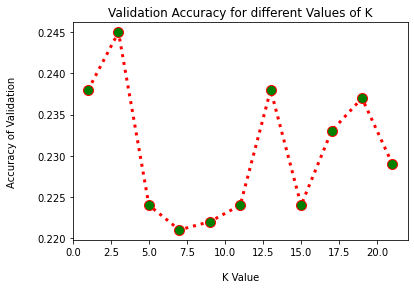

In [7]:
plt.plot(r_values, Accuracy_List,color='red', linestyle='dotted', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=10) 

plt.xlabel('K Value',labelpad=15)
plt.ylabel('Accuracy of Validation',labelpad=20)
plt.title('Validation Accuracy for different Values of K')
plt.show()

<h3>Finding Optimal K using r - Fold Cross Validation</h3>

In [8]:
optimalK = r_values[Accuracy_List.index(max(Accuracy_List))]
print('The Optimal Value of K is:', optimalK)

The Optimal Value of K is: 3


<h3>Training Error and Testing Error</h3>

In [9]:
testData = KNNAlgo(Test_X, Train_X, Train_Y, optimalK)
trainData = KNNAlgo(Train_X, Train_X, Train_Y, optimalK)
print("Test data Error = ", (100 - accuracy_score(Test_Y, testData)*100), "%")
print("\nTrain data Error = ", (100 - accuracy_score(Train_Y, trainData)*100), "%")

Test data Error =  77.5 %

Train data Error =  17.75 %


<h3>Confusion Matrix</h3>

In [10]:
print("\n",confusion_matrix(Test_Y,testData))


 [[ 3  0  2  1  5  0  1  0  6  2]
 [ 0  3  0  1  1  0  5  0  3  1]
 [ 4  0  5  1  7  2  1  0  1  0]
 [ 1  0  1  2  8  2  3  0  1  1]
 [ 3  0  5  1  4  0  0  0  2  0]
 [ 4  0  4  3  2  1  3  1  0  0]
 [ 2  0  2  1 12  0  8  0  1  0]
 [ 2  0  1  2  4  3  2  1  2  1]
 [ 4  0  3  1  4  0  0  0 15  1]
 [ 2  0  1  1  1  0  3  0 10  3]]


<h3>Classification Report</h3>

In [11]:
print("\n",classification_report(Test_Y, testData, zero_division=0))


               precision    recall  f1-score   support

           0       0.12      0.15      0.13        20
           1       1.00      0.21      0.35        14
           2       0.21      0.24      0.22        21
           3       0.14      0.11      0.12        19
           4       0.08      0.27      0.13        15
           5       0.12      0.06      0.08        18
           6       0.31      0.31      0.31        26
           7       0.50      0.06      0.10        18
           8       0.37      0.54      0.43        28
           9       0.33      0.14      0.20        21

    accuracy                           0.23       200
   macro avg       0.32      0.21      0.21       200
weighted avg       0.31      0.23      0.22       200



<h3>Precision v/s Recall</h3>

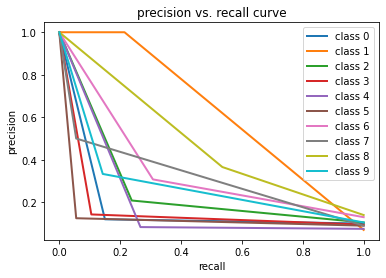

In [12]:
Test_Y = label_binarize(Test_Y, classes=[0,1,2,3,4,5,6,7,8,9])
testData = label_binarize(testData, classes=[0,1,2,3,4,5,6,7,8,9])

precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(Test_Y[:, i],
                                                        testData[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()